# Laboration - Covid-19
- Covid-19 pandemin har påverkat hela världen med många dödsfall som följd. 
- Ett kraftfullt verktyg för att
förstå hur viruset påverkar världen är att analysera och visualisera data för att förstå trender

--------------------

## Uppgift 1 -  uppvärmning covid-19 data

- Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument.
- Använd därefter Pandas för
att läsa in bladet: "Veckodata Riket" i covid19-filen.

In [88]:
import pandas as pd

In [89]:
veckodata = pd.read_excel("../Lab1-Covid/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")
veckodata.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


#### A) 
- Gör initial dataanalys för att snabbt få en överblick över datasetet. 
- Använd metoder som ex. info(), describe(), value_counts(), head(), columns, index för att snabbt få en överblick.

In [90]:
veckodata.info(), veckodata.describe(), veckodata.value_counts(), veckodata.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

(None,
                 år  veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
 count   142.000000   142.000000        142.000000                  142.000000   
 mean   2020.957746    26.035211      18378.345070                  177.197183   
 std       0.797809    14.228835      38569.455753                  371.689114   
 min    2020.000000     1.000000          0.000000                    0.000000   
 25%    2020.000000    14.000000       3075.000000                   30.000000   
 50%    2021.000000    26.000000       5531.000000                   53.000000   
 75%    2022.000000    37.750000      21125.000000                  203.500000   
 max    2022.000000    53.000000     265043.000000                 2554.000000   
 
        Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
 count                    142.000000    1.420000e+02          142.000000   
 mean                     354.169014    1.125288e+06        10843.281690   
 std                     

142 entries med inga null värden. Typer är i float och int vilket gör att vi kan utföra uträkningar direkt.

------------------------------------

#### B) 
Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format: 2020v6 


In [91]:
veckodata["Vecka"] = veckodata["år"].astype("str") + "v" + veckodata["veckonummer"].astype("str")
veckodata.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


------------------------------
#### C - F
 - c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.
 - d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.
 - e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till
nu.
 - f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.


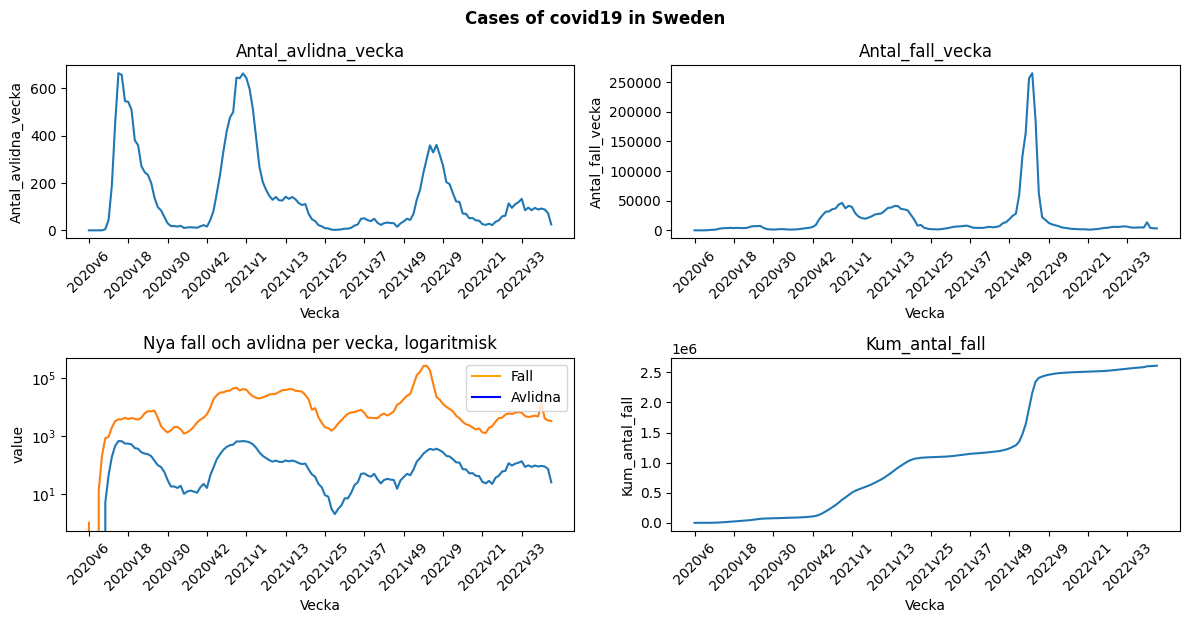

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))

y_variables = ["Antal_avlidna_vecka","Antal_fall_vecka", "Antal_avlidna_vecka", "Kum_antal_fall"]

for ax, y_variable in zip(axes.flatten(), y_variables):
    sns.lineplot(data=veckodata, x="Vecka", y=y_variable, ax=ax)
    ax.set(title=f"{y_variable}", ylabel=f"{y_variable}", xticks=veckodata["Vecka"][::12])
    ax.tick_params(axis = "x", rotation = 45)
    plt.grid()

sns.lineplot(data=veckodata, x="Vecka", y=y_variables[1], ax=axes[1,0])  
axes[1,0].set(title="Nya fall och avlidna per vecka, logaritmisk", ylabel="value", xticks=veckodata["Vecka"][::12])
axes[1,0].set_yscale("log") 


# Hade problem att legenden inte visade färg så gjorde "custom" på den.
import matplotlib.lines as mlines
cases = mlines.Line2D([], [], color='orange', label='Fall')
deaths = mlines.Line2D([], [], color='blue', label='Avlidna')
axes[1,0].legend(handles=[cases, deaths])



fig.tight_layout()
fig.suptitle("Cases of covid19 in Sweden", y=1.03, fontweight="bold")
plt.savefig("Visualiseringar/Upg1.covid19.png", facecolor="white")

### Plotly express plots.

In [93]:

# Funktion för att plotta

import plotly_express as px


def px_line(dataframe=veckodata, x="Vecka", log_y=False, y=None, title=None):
    
    fig = px.line(dataframe, x=x, y=y, markers=True, log_y=log_y, title=title, labels=dict(Vecka="week"))

    fig.update_layout(hovermode="x")
    fig.update_xaxes(showspikes=True, spikedash="solid", spikemode="across", spikesnap="cursor")
    fig.show()
    fig.write_html(f"Visualiseringar/Upg1.{title}.html", auto_open=False)

In [94]:
# Loopa igenom funktionen

y_variables = {"Antal_avlidna_vecka": "Avlidna per vecka","Antal_fall_vecka" : "Nya fall per vecka", "Antal_avlidna_vecka": "Avlidna per vecka", "Kum_antal_fall": "Totalt kumulerade fall"}

for y_variable in y_variables:
    px_line(y=y_variable, title=y_variables[y_variable])


# separat 
px_line(y=["Antal_avlidna_vecka", "Antal_fall_vecka"], log_y=True, title="Nya fall och avlidna per vecka, logaritmisk")


---------------------
## Uppgift 2 - uppvärmning vaccindata
- I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder.
- Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. 
- Använd Pandas för att svara på frågor om datasetet.

------------------------

In [95]:
import pandas as pd

In [96]:
vaccindata = pd.read_excel("../Lab1-Covid/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")
vaccindata.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,836,753,NaN,NaN,0.694929,0.625935,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4883,4464,1957.0,NaN,0.729677,0.667065,0.292439,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5550,5249,2881.0,NaN,0.756956,0.715903,0.392935,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5587,5425,3720.0,NaN,0.804348,0.781025,0.535560,NaN


a) Hur många län finns representerade?


In [97]:
antal_län = vaccindata["Län_namn"].unique()
print(f"Det finns {len(antal_län)} representerade i datan.")

Det finns 21 representerade i datan.


b) Hur många kommuner finns representerade i datasetet?


In [98]:
antal_kommuner = vaccindata["Kommun_namn"].unique()
print(f"Det finns {len(antal_kommuner)} representerade i datan.")

Det finns 290 representerade i datan.


c) Hur stor är befolkningen som är representerad i datasetet?


In [99]:
total_befolkning = vaccindata["Befolkning"].sum()
print(f"Totala befolkning är {total_befolkning} som är representerad i datan.")

Totala befolkning är 9092790 som är representerad i datan.


d)  Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp
statistik på hur stor totala befolkningen är i Sverige.


In [100]:

# Total folkmängd tagen från senaste excel från scb
befolkning_sverige = pd.read_excel("../Lab1-Covid/tabkv12022.xlsx", sheet_name="Totalt")
folkmängd = befolkning_sverige.iloc[7]["Unnamed: 2"]
print(f"Total folkmängd: {folkmängd} vid Jan-2022.")

# Vaccin data settet har inte med åldrar under 12 verkar det som. Så jag räknar alla över 18 och subtraherar från totala befolkningen 
# folkmängd över > 18.
above_18 = vaccindata.loc[(vaccindata['Ålder'] != '12-15') & (vaccindata['Ålder'] != '16-17')]
print(f"Total folkmängd över 18: {above_18['Befolkning'].sum()}")

# Folkmängd under 18.
under_18 = folkmängd - above_18["Befolkning"].sum()
print(f"Total folkmängd under 18: {under_18}")

Total folkmängd: 10468482 vid Jan-2022.
Total folkmängd över 18: 8347420
Total folkmängd under 18: 2121062


e)  Rita upp ålderfördelningen i ett diagram (vaccin_dataset)

In [101]:

age_vaccindata = vaccindata.groupby(["Ålder"]).sum(numeric_only = True).reset_index()
fig = px.bar(age_vaccindata, x = "Ålder", y = "Befolkning", title = "Åldersfördelning i Sverige mellan 12 och 90+")
fig.write_image("Visualiseringar/Upg2.Åldersfördelning_Covid19_Dataset.png")
fig.show()

f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län

In [102]:


vaccin_län = vaccindata.groupby(["Län_namn"])[["Befolkning", "Antal minst 1 dos", "Antal minst 2 doser", "Antal 3 doser"]].sum()


vaccin_andel_län = vaccindata.groupby(["Län_namn"])[["Befolkning", "Antal minst 1 dos", "Antal minst 2 doser", "Antal 3 doser"]].sum()
vaccin_andel_län["Andel 1 Dos"] = (vaccin_andel_län["Antal minst 1 dos"] / vaccin_andel_län["Befolkning"]).round(2) * 100
vaccin_andel_län["Andel 2 Dos"] = (vaccin_andel_län["Antal minst 2 doser"] / vaccin_andel_län["Befolkning"]).round(2) * 100
vaccin_andel_län["Andel 3 Dos"] = (vaccin_andel_län["Antal 3 doser"] / vaccin_andel_län["Befolkning"]).round(2) * 100

vaccin_andel_län.head(),
fig = px.bar(vaccin_län, barmode='group', labels={'value':'Befolkning', 'Län_namn':'Län', 'variable':'Län'}, title="Befolkning per Län med antal doser tagna")
fig.update_layout(height=500, width=1000)
fig.write_image("Visualiseringar/Upg2_Antal_doser_Covid19_Dataset.png")
fig.show()

In [103]:
# Andel doser procentuellt
vaxx_plot = vaccin_andel_län.drop(['Antal minst 1 dos', 'Antal minst 2 doser', 'Antal 3 doser', 'Befolkning'], axis = 1) 
fig = px.bar(vaxx_plot, barmode='group', labels={'value':'Procent % ', 'Län_namn':'Län', 'variable':'Antal Doser'}, title="Procentuell vaccinationsgrad" )
fig.update_layout(height=500, width=1000)
fig.write_image("Visualiseringar/Upg2_Procent_doser_Covid19_Dataset.png")
fig.show()

g) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos, två doser, tre doser och fyra doser.

In [104]:

vaccin_4_doser = vaccindata.groupby(["Län_namn"])[["Befolkning", "Antal minst 1 dos", "Antal minst 2 doser", "Antal 3 doser", "Antal 4 doser"]].sum()
vaccin_4_doser["Andel 4 Dos"] = (vaccin_4_doser["Antal 4 doser"] / vaccin_4_doser["Befolkning"]).round(2) * 100

vaxx_plot["Andel 4 Dos"] = vaccin_4_doser["Andel 4 Dos"]
sthlm_götaland = vaxx_plot.filter(items = ['Stockholms län', 'Västra Götalands län'], axis=0)

fig = px.bar(sthlm_götaland, barmode='group', labels={'value':'Procent % ', 'Län_namn':'Län', 'variable':'Antal Doser'}, title="Procentuell vaccinationsgrad" )
fig.write_image("Visualiseringar/Upg2_Procent_Vgöta_Sthlm_doser_Covid19_Dataset.png")
fig.show()

--------------------------------------------------
# KPI Uppgift 3 - KPIer & explorativ dataanalys

- Samtliga län har en vaccinations grad mellan 80-90% med minst 2 doser
- Så det skulle vara intressant att se generellt hur utvecklingen har varit. 

----------------------------------
Kan börja se antal fall per dag.

In [105]:
fall_per_dag = pd.read_excel("../Lab1-Covid/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Antal per dag region")
fig = px.bar(data_frame = fall_per_dag, x = 'Statistikdatum', y = 'Totalt_antal_fall', labels={"Totalt_antal_fall" : "Fall per dag"}, color_discrete_sequence = ['black'], title="Antal fall per dag")
fig.update_layout(height=500, width=1000)
fig.write_image("Visualiseringar/Upg3_Antal_Fall_per_Dag.png")
fig.show()

- Vi kan se att vid 2022 Januari så har antal fall skjutit i höjden. Lättade restriktioner, nyårsfirande, vinter(mer tid inomhus) vilket kan vara förklaringen.
- Vi titta vidare på hur många vacciner har utfärdats
------------------
#### Totalt administrerade vaccinationer till svenska befolkningen
Räknat med samtliga doseringar

In [106]:
vaccinationer = pd.read_excel("../Lab1-Covid/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinationer tidsserie")
# Vi slår ihop år och vecka till en column
vaccinationer["Vecka"] = vaccinationer["År"].astype("str") + "v" + vaccinationer["Vecka"].astype("str")

# Filtera column på bara sverige och gå på totalt. Vi tar inte hänsyn till hur många doser utan bara antal som helhet för att få en översyn
vaccinationer_sverige = vaccinationer[vaccinationer["Region"].str.contains("Sverige")]

# Plot
fig = px.bar(data_frame = vaccinationer_sverige, x = 'Vecka', y = 'Antal vaccinationer', title="Totalt administrerade vaccinationer för Sveriges befolkning")
fig.update_layout(height=500, width=1000)
fig.write_image("Visualiseringar/Upg3_Antal_vaccin_totalt.png")
fig.show()


In [107]:
nyår = vaccinationer_sverige[(vaccinationer_sverige['Vecka'] == "2021v1") | (vaccinationer_sverige['Vecka'] == "2022v1")]
nyår

,Vecka,År,Region,Antal vaccinationer
44,2021v1,2021,| Sverige |,53258
1188,2022v1,2022,| Sverige |,18002788


- Nyår 2022 vecka 1 kan vi see att ca 18 miljoner vacciner har blivit administrerade. Föregående år så hade vi knappt omkring 50 000.
- Ca 1,8 vacciner per person vid nyår 2022, jämfört med föregående nyår som ger ca 0,005 vacciner per person.(räknat på 10 miljoner invånare)

Nästa steg kan vi se på om det reflekterar över dödligheten. Förväntan är att se dödligheten minska efter insjukning av Covid.

In [108]:

dödlighet = pd.read_excel("../Lab1-Covid/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

# gör en ny kolumn för datum + vecka
dödlighet["Vecka"] = dödlighet["år"].astype("str") + "v" + dödlighet["veckonummer"].astype("str")

# Räknar andel dödliga fall dividerad med alla fall.
dödlighet["Dödlighet"] = (dödlighet["Antal_avlidna_vecka"] / dödlighet["Antal_fall_vecka"]) * 100


# Plot
fig = px.line(data_frame = dödlighet, x = 'Vecka', y = 'Dödlighet', title="Andel fall som leder till död", labels={"Dödlighet" : "Procent %"})
fig.update_layout(height=500, width=1000)
fig.write_image("Visualiseringar/Upg3_Andel_fall_dödlig_procent.png")
fig.show()

- Vi kan se att risken att dö har minskat sedan vaccineringen påbörjades, men samtidigt som vi går mer mot idag, så ser vi en lätt ökning men en sidgående trend än så länge.
Vidare kan vi se på antalet för att lättare se om hur många det handlar om.

In [109]:
avlidna_per_dag = pd.read_excel("../Lab1-Covid/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Antal avlidna per dag")
avlidna_per_dag= avlidna_per_dag[:959] # Sista raden saknade datum så tar bort den.

avlidna_per_dag['Datum_avliden'] = avlidna_per_dag['Datum_avliden'].astype(str).str.rstrip(' 00:00:00') # Rensar bort timme,minut,sekund.

fig = px.bar(data_frame = avlidna_per_dag, x = 'Datum_avliden', y = 'Antal_avlidna', color_discrete_sequence=["red"], labels={"Datum_avliden" : "Datum", "Antal_avlidna": "Avlidna"}, title="Antal avlidna per dag")
fig.update_layout(height=500, width=1000)
fig.write_image("Visualiseringar/Upg3_Antal_avlidna.png")
fig.show()

Att vi ser en liten ökning på senare tid kan bero på flera faktorer.
 - 1 april 2022 klassas covid-19 inte längre som en allmänfarlig och samhällsfarlig sjukdom. Kan ha en påverkan på beteende som tex distanshållning.
 - Färre som vaccinerar sig
 - Färre som förnyar sitt skydd

Så slutligen kan vi undersöka hur trenderna har varit med vaccineringen.

In [110]:
pd.options.mode.chained_assignment = None  # Ta bort en varningstext

vaccinationer_sverige["Antal nya vacciner administrerade"] = vaccinationer_sverige["Antal vaccinationer"].diff()
fig = px.line(data_frame = vaccinationer_sverige, x = 'Vecka', y = 'Antal nya vacciner administrerade', labels={"Antal nya vacciner administrerade": "Antal Vacciner"}, title="Antal nya vacciner administrerade per vecka")
fig.update_layout(height=500, width=1000)
fig.write_image("Visualiseringar/Upg3_Antal_vacciner_veckovis.png")
fig.show()

 - Denna är intressant att se på då den visar tydligt när trenden vänder och fler söker vaccination jämfört med veckorna innan. Vi ser en skarp ökning mellan vecka 33-36. Vilket är väntat då många vaccinerar sig inför skola eller jobb. Det ser ut också som det är "sista minuten" så man hade kunnat uppmuntra allmänheten lite att starta lite tidigare då det kan ta veckor att ge effekt.

 - Vi kan se att antalet som vaccinerar avtog sedan den klassades inte längre som en allmänfarlig och samhällsfarlig sjukdom, våren 2022.

#### Sammanfattning 

- Vaccin minskar dödligheten. Distanshållning, restriktioner minskar antal fall.
- Trenden att vaccinera sig eller förnya har gått ner sedan våren. Men har vänt nu till hösten delvis.
- Dödligheten har börjat öka igen på en nivå runt 1-2 % och inte svävat iväg som innan då vi var uppe mot 15% i början av pandemin.
    - Ökningen kan bero på många faktorer, som tex beteende(inga restriktioner), minskad vaccination, mer inomhus(jobb/skola).
    - Sidgående trend kan vara allmän immunitet eller skydd från tidigare vaccin.
- Vinterperioder har flest fall. 
